In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import pywt

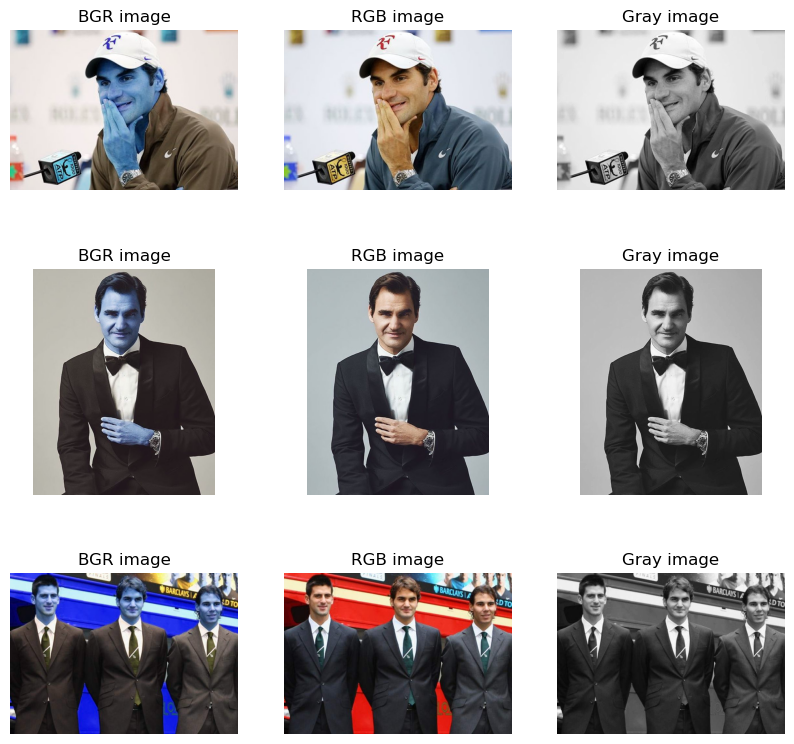

In [2]:
path_img_tests = [('./test_images/federer'+str(i)+'.jpg') for i in range(1,4)]
plt.figure(figsize=(10,10))
for i in range(1,4):
    img_test = cv2.imread(path_img_tests[i-1])
    plt.subplot(3,3,3*(i-1) + 1), plt.imshow(img_test)
    plt.title('BGR image')
    plt.axis('off') 
    img_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,3*(i-1) + 2), plt.imshow(img_rgb)
    plt.title('RGB image')
    plt.axis('off') 
    img_gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
    plt.subplot(3,3,3*(i-1) + 3), plt.imshow(img_gray, cmap = 'gray')
    plt.title('Gray image')
    plt.axis('off') 
plt.show()

In [3]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

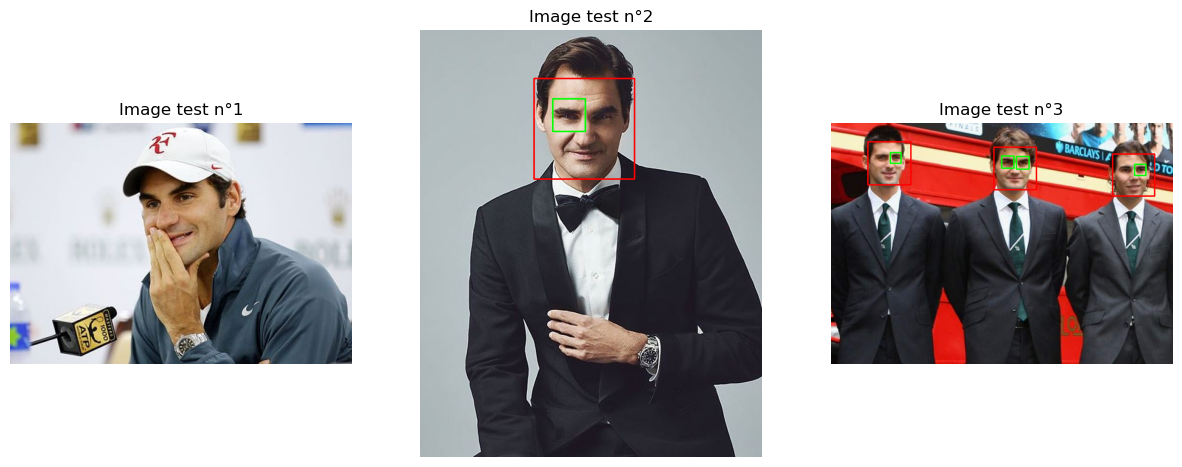

In [4]:
index_subplot=0
plt.figure(figsize=(15, 15))
for img_path in path_img_tests:
    index_subplot += 1
    image = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(img_gray, scaleFactor=1.2, minNeighbors=5)
    face_img = img_rgb.copy()
    for (x,y,w,h) in face:
        face_img = cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = img_gray[y:y+h, x:x+w]
        roi_rgb = face_img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_rgb,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    plt.subplot(1,3,index_subplot), plt.imshow(face_img, cmap='gray')
    plt.axis('off')
    plt.title('Image test n°' + str(index_subplot))
plt.show()

In [5]:
def crop_faces_from_full_image(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cropped_images = []
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.2, minNeighbors=5)
    if len(faces) == 0:
        return None

    for (x, y, w, h) in faces:
        roi_gray = img_gray[y:y+h, x:x+w]
        roi_color = img_rgb[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) > 0:
            cropped_images.append(roi_color)
    if len(cropped_images) == 0:
        return None
    
    return cropped_images

def save_cropped_image(image, count, name):
    cropped_images = crop_faces_from_full_image(image)
    if cropped_images is None:
        return
        
    output_dir = f'./images_dataset/cropped/{name}'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for index, face in enumerate(cropped_images):
        filename = os.path.join(output_dir, f'{count}_{index}.jpg')
        cv2.imwrite(filename, cv2.cvtColor(face, cv2.COLOR_RGB2BGR)) 

In [6]:
import shutil
path_cropped_data = './images_dataset/cropped/'
if os.path.exists(path_cropped_data):
    shutil.rmtree(path_cropped_data)
os.mkdir(path_cropped_data)

In [7]:
import os
img_dirs = []
for entry in os.scandir('./images_dataset/'):
    if entry.is_dir():
        if entry.path=='./images_dataset/cropped':
            pass
        else:
            img_dirs.append(entry.path)

In [8]:
print(img_dirs)

['./images_dataset/serena_williams', './images_dataset/roger_federer', './images_dataset/virat_kohli', './images_dataset/lionel_messi', './images_dataset/maria_sharapova']


In [9]:
img_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.jfif']
for celebrity_dir in img_dirs:
    pict_index = 0
    cel_name = celebrity_dir.split('/')[-1]
    print('Cropping images of '+cel_name+' ...')
    if os.path.exists(path_cropped_data+cel_name):
        shutil.rmtree(path_cropped_data+cel_name)
    os.mkdir(path_cropped_data+cel_name)
    for file in os.scandir(celebrity_dir):
        if file.is_file():
            if os.path.splitext(file.name)[1].lower() in img_extensions:
                image = cv2.imread(file.path)
                save_cropped_image(image, pict_index, cel_name)
                pict_index+=1
            else:
              print(f'The extension used here ({os.path.splitext(file.name)[1].lower()}) is not suitable for the processing required to classify images.') 
print('Cropping done !')

Cropping images of serena_williams ...
Cropping images of roger_federer ...
Cropping images of virat_kohli ...
Cropping images of lionel_messi ...
Cropping images of maria_sharapova ...
Cropping done !


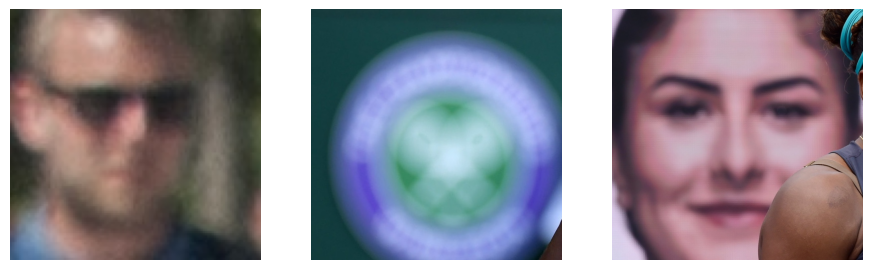

In [10]:
index_subplot = 0
plt.figure(figsize=(11, 11))
for outlier_ex in os.scandir('./outliers_examples'):
    index_subplot += 1
    im_out = cv2.imread(outlier_ex.path)
    im_out = cv2.cvtColor(im_out, cv2.COLOR_BGR2RGB)
    plt.subplot(1,3,index_subplot), plt.imshow(im_out)
    plt.axis('off')
plt.show()

Outliers and duplicals removing

In [11]:
outliers_index_serena = ['2_0','2_1','5_0','5_1','5_2','5_3','5_4','5_5','5_6','7_1','11_1','16_1','16_2','17_0','25_0','32_0','35_1','38_0','42_0','50_1','51_0','53_1','54_1','54_2','64_0','64_1']
outliers_index_roger = ['21_1','21_2','21_3','30_0','30_1','33_1','44_1','46_1']
outliers_index_virat = ['16_1','20_1','26_0','34_0','35_0','35_1','36_1','55_0','72_0','78_0','96_0','99_0']
outliers_index_lionel = ['5_1','5_2','6_0','24_0','24_1','33_1','33_2','34_1','38_0','38_1','38_2','38_3','55_1']
outliers_index_maria = ['2_1','26_2','26_3','31_0','31_2','39_0','39_1','39_2','41_1','48_1','62_0']

In [12]:
dict_outl = {
    'sw' :{
        'crop_folder_path':'./images_dataset/cropped/serena_williams',
        'outliers_index':['2_0','2_1','5_0','5_1','5_2','5_3','5_4','5_5','5_6','7_1','11_1','16_1','16_2','17_0','25_0','32_0','35_1','38_0','42_0','50_1','51_0','53_1','54_1','54_2','64_0','64_1'],
        'target_label':1
    }, 
    'rf' :{
        'crop_folder_path':'./images_dataset/cropped/roger_federer',
        'outliers_index':['21_1','21_2','21_3','30_0','30_1','33_1','44_1','46_1'],
        'target_label':2
    },
    'vk' :{
        'crop_folder_path':'./images_dataset/cropped/virat_kohli',
        'outliers_index':['16_1','20_1','26_0','34_0','35_0','35_1','36_1','55_0','72_0','78_0','96_0','99_0'],
        'target_label':3
    },
    'lm' :{
        'crop_folder_path':'./images_dataset/cropped/lionel_messi',
        'outliers_index':['5_1','5_2','6_0','24_0','24_1','33_1','33_2','34_1','38_0','38_1','38_2','38_3','55_1'],
        'target_label':4
    },
    'ms' :{
        'crop_folder_path':'./images_dataset/cropped/maria_sharapova',
        'outliers_index':['2_1','26_2','26_3','31_0','31_2','39_0','39_1','39_2','41_1','48_1','62_0'],
        'target_label':5
    }
}
    

In [13]:
for athlete, dict_params in dict_outl.items():
    for index in dict_params['outliers_index']:
        os.remove(dict_params['crop_folder_path']+'/'+index+'.jpg')

In [14]:
def wavelet_transform(image, mode='haar', level=1):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = np.float32(gray)
    gray = gray/255
    coeffs_wt = pywt.wavedec2(gray, mode, level = level)
    coeffs_h = list(coeffs_wt)
    coeffs_h[0] = coeffs_h[0]*0
    gray_h = pywt.waverec2(coeffs_h, mode)
    gray_h = gray_h*255
    gray_h = np.uint8(gray_h)
    return gray_h

In [15]:
from sklearn.decomposition import PCA

def pca_transform(image, n_components=50):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_flat = gray.flatten().astype(float)
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform([gray_flat])
    
    return pca_features

In [16]:
from skimage.feature import local_binary_pattern

def lbp_transform(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    radius = 1 
    n_points = 8 * radius
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    return lbp

In [17]:
def hog_transform(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(gray)
    return hog_features

In [18]:
def sift_transform(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    if descriptors is None:
        return np.zeros((1, 128))
    return descriptors

In [19]:
X_raw=[]
X_wav=[]
X_pca=[]
X_lbp=[]
X_hog=[]
X_sift=[]
y=[]
for _, dict_params in dict_outl.items():
    for file in os.scandir(dict_params['crop_folder_path']):
        raw_image = cv2.imread(file.path)
        scaled_raw = cv2.resize(raw_image, (128,128))
        scaled_raw = cv2.cvtColor(scaled_raw, cv2.COLOR_BGR2RGB)
        
        img_har =  wavelet_transform(scaled_raw, 'db1', 5)
       # scaled_img_har = cv2.resize(img_har, (64,64))

        img_lbp = lbp_transform(scaled_raw)
       # scaled_lbp = cv2.resize(img_lbp, (64,64))

        img_hog = hog_transform(scaled_raw)
       # scaled_hog = cv2.resize(img_hog, (64,64))

        img_sift = sift_transform(scaled_raw)
       # scaled_sift = cv2.resize(img_sift, (64,64))
        
        X_raw.append(scaled_raw)
        X_wav.append(img_har)
        X_lbp.append(img_lbp)
        X_hog.append(img_hog)
        X_sift.append(img_sift)
        y.append(dict_params['target_label'])

In [20]:
X_raw[2].shape

(128, 128, 3)

(-0.5, 127.5, 91.5, -0.5)

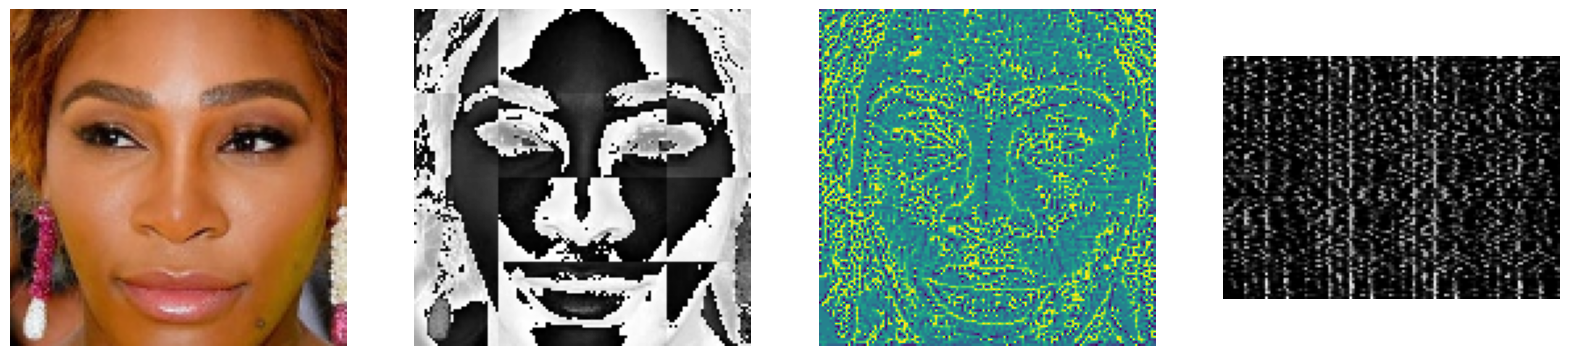

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1),plt.imshow(X_raw[0])
plt.axis('off')
plt.subplot(1,4,2),plt.imshow(X_wav[0], cmap = 'gray')
plt.axis('off')
plt.subplot(1,4,3),plt.imshow(X_lbp[0])
plt.axis('off')
# plt.subplot(1,5,4),plt.imshow(X_hog[0], cmap = 'gray')
# plt.axis('off')
plt.subplot(1,4,4),plt.imshow(X_sift[0], cmap = 'gray')
plt.axis('off')

In [106]:
X_sift[0].max()

184.0

In [124]:
X_raw = [image.flatten()/X_raw[0].max() for image in X_raw]
X_wav = [image.flatten()/X_wav[0].max() for image in X_wav]
X_lbp = [image.flatten()/X_lbp[0].max() for image in X_lbp]
X_sift = [image.flatten()/X_sift[0].max() for image in X_sift]

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
parameters={
    'svm':{
        'model':SVC(),
        'params':{
            'C':[1,5,10],
            'kernel':['rbf','linear'],
            'gamma':['scale','auto']
        }
    },
    'rf':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,1000],
            'criterion':['gini','entropy']
        }
    },
    'lr':{
        'model':LogisticRegression(max_iter=1000),
        'params':{
            'fit_intercept':[True,False],
            'penalty':['l1', 'l2', 'elasticnet', None]
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,5,7,10],
            'weights':['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    }
}
    
        
                    

In [45]:
%%time
for model_name, model_params in parameters.items():
    if model_name == 'svm':
        nb_max_iter = 6
    elif model_name == 'rf':
        nb_max_iter = 4
    elif model_name == 'lr':
        nb_max_iter = 10
    elif model_name == 'knn':
        nb_max_iter = 10
    rscv = RandomizedSearchCV(model_params['model'], model_params['params'], cv = 5, verbose = 2, n_iter=nb_max_iter, n_jobs = -1)
    rscv.fit(X_hog, y)
    print(f'Les meilleures performances de {model_name} sont de {rscv.best_score_}, atteintes avec les paramètres {rscv.best_params_}. \n')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Les meilleures performances de svm sont de 0.9264569842738206, atteintes avec les paramètres {'kernel': 'linear', 'gamma': 'scale', 'C': 10}. 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Les meilleures performances de rf sont de 0.891581868640148, atteintes avec les paramètres {'n_estimators': 1000, 'criterion': 'gini'}. 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/clement/anaconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/clement/anaconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/clement/anaconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File 

Les meilleures performances de lr sont de 0.9135060129509712, atteintes avec les paramètres {'penalty': 'l2', 'fit_intercept': False}. 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Les meilleures performances de knn sont de 0.7876965772432933, atteintes avec les paramètres {'weights': 'distance', 'n_neighbors': 7, 'algorithm': 'ball_tree'}. 

CPU times: user 33.6 s, sys: 7.46 s, total: 41 s
Wall time: 1min 43s
[CV] END ........................C=5, gamma=auto, kernel=rbf; total time=   3.3s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   3.1s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.8s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   3.4s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   2.8s
[CV] END ...................criterion=gini, n_estimators=100; total time=   1.6s
[CV] END ..................criterion=gini, n_estimators=1000; total time=  17.3s
[C